**Uporządkowanie danych**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re 

path = "..\Original_Data\weather.txt"

# Wczytywanie oryginalnych danych
with open(path) as f:
    original_data  = f.readlines()
    

# Przygotowanie danych do zapisu w formie tabeli
regex = re.compile('(\s+I|S|OI|OS|\s+SI)')
data = [] 
for line in original_data:
    line = line.replace("MIN", "MIN ")
    line = line.replace("MAX", "MAX ")
    line = line.replace("PRCP", "PRCP ")
    line = regex.sub(' ', line) 
    
    essentials = ["MX17004",line[11:15],line[15:17],line[17:21]]
    mondata = line[21:].split()
    data.append(essentials + mondata)

#ze wględu na niepoprawny zapis lub brak odczytu znacznej ilości danych do analizy wycinamy dane poprawnie zapisane
data = data[:879]


#zapis danych jako DataFrame z  odpowiednimi wartościami kolumn    - 
data_frame = pd.DataFrame(data)
days = [i for i in range(1,32)]
data_frame.columns = ["weather_station","year","month","type"] + days
data_frame = pd.melt(data_frame,["weather_station","year", "month","type"])
data_frame = data_frame[data_frame.value !="-9999"]  #usunięcie pozostałych błędnie zapisanych danych, są one odrzucane

# zmiana zapisu danych - wygenerowanie z poprzednich kolumn kolumny z informacją o dacie w formacie YYYY-MM-DD
data_frame = data_frame.assign(date = data_frame.year.astype(str) + "-" + data_frame.month.astype(str) + "-" + data_frame.variable.astype(str)[:] )
data_frame.pop("year")      # usunięcie kolumn użytych do wygenerowania zapisu daty - jest to konieczne ponieważ    
data_frame.pop("month")     #ta informacja zostałaby powielona
data_frame.pop("variable")
data_frame.pop("weather_station")

    
tidied_data = data_frame.pivot(index="date", columns="type", values="value")


#sprowadzenie danych do odpowidnich jednostek
tidied_data["TMAX"] = pd.to_numeric(tidied_data["TMAX"])/10
tidied_data["TMIN"] = pd.to_numeric(tidied_data["TMIN"])/10
tidied_data["PRCP"] = pd.to_numeric(tidied_data["PRCP"])
print(tidied_data)
data_frame.to_csv("..\Analysis_Data\weather_cleaned.csv")


type        PRCP  TMAX  TMIN
date                        
1955-04-1      0  31.0  15.0
1955-04-10     0  33.0  17.0
1955-04-11     0  33.0  17.0
1955-04-12     0  32.0  16.0
1955-04-13     0  31.0  16.0
...          ...   ...   ...
1980-12-5      0  26.0  14.0
1980-12-6      0  27.0  15.5
1980-12-7      0  25.0  15.0
1980-12-8      0  26.5  14.0
1980-12-9      0  26.5  15.5

[8982 rows x 3 columns]


**Prezentacja danych w formie wykresu**

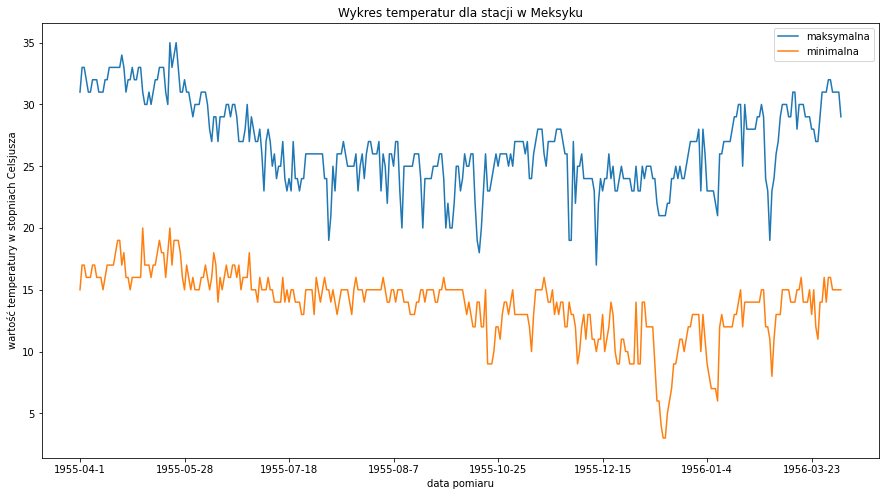

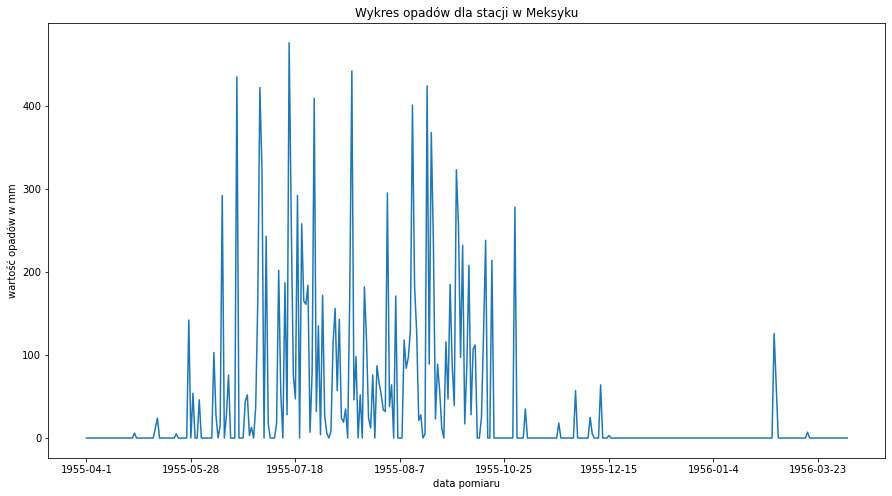

In [2]:
# Ze względu na dużą ilość danych na wykresavh został przedstawiony tylko jeden  rok w celu ułatwienia odczytu danych
plt.figure(figsize=(15, 8))
tidied_data.TMAX[0:365].plot()
tidied_data.TMIN[0:365].plot()

plt.legend(["maksymalna","minimalna"])
plt.title("Wykres temperatur dla stacji w Meksyku")
plt.xlabel("data pomiaru")
plt.ylabel("wartość temperatury w stopniach Celsjusza")

plt.savefig("..\Analysis_Data\graph-tempetature.png")
plt.show()


plt.figure(figsize=(15, 8))
tidied_data.PRCP[0:365].plot()
plt.title("Wykres opadów dla stacji w Meksyku")
plt.xlabel("data pomiaru")
plt.ylabel("wartość opadów w mm")

plt.savefig("..\Analysis_Data\graph-precipitation.png")
plt.show()
